<a href="https://colab.research.google.com/github/DataEtnos/churn-case/blob/main/CASE_DE_PREVIS%C3%83O_DE_CHURNED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Preveja os usuários com alta chance de deixar seu Streaming
Utilize um modelo de classificação para mapear qual o perfil de
usuários tem mais chance de deixar sua plataforma de streaming.
Compreender quem é o perfil que está aumentando o churn do seu
negócio é essencial para tomar ações que reduzam essas perdas,
seja alterando critérios na venda ou modificando o produto.
Contexto


Você trabalha em uma plataforma de streaming e a diretoria está preocupada com o
alto índice de usuários cancelando as suas assinaturas. Eles acreditam que é possível
prever se um usuário tem mais chance de deixar a plataforma antes que isso aconteça,
e com base nessa informação tomar ações para reduzir o churn.



Seu objetivo é criar um modelo de classificação capaz de prever se um usuário tem
mais chance de cancelar a sua assinatura na plataforma ou não. Para isso, a empresa
forneceu uma base de dados em csv contendo dados sobre as contas dos clientes.
Sobre os dados
Uma adaptação do problema de ecommerce, disponível no Kaggle.

Os dados fornecidos possuem informações sobre as contas dos clientes na plataforma
de streaming, divididos entre contas Basic, Standard e Premium, onde cada uma
oferece uma gama maior de serviços que a anterior.

In [2]:
!pip install scikit-learn

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import  OrdinalEncoder , LabelEncoder,minmax_scale,scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from  sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

In [4]:
df =  pd.read_csv("/content/streaming_data.csv")
df.head()

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
0,49.0,Male,4700.0,3.0,Basic,NaN,3,NaN,0.0,a271aa56-bcfc-4f0a-91f7-b773de6b86a4
1,69.0,Female,6107.0,2.0,Standard,NaN,1,2.14,0.0,fe14b048-770b-4619-8ec6-485b0969ae31
2,44.0,Male,6374.0,3.0,Premium,1.0,1,1.91,1.0,0283dffd-6684-4a05-9c6f-c02098a6849d
3,26.0,Male,NaN,5.0,Basic,NaN,2,NaN,NaN,c316f2f5-3403-4a0a-82c2-c98e4b3379d2
4,18.0,NaN,1948.0,3.0,Basic,NaN,3,3.88,0.0,14879bcb-1977-4ad8-a7f9-6aa9bf7b872f


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77884 entries, 0 to 77883
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     66607 non-null  float64
 1   Gender                  63368 non-null  object 
 2   Time_on_platform        56464 non-null  float64
 3   Devices_connected       52696 non-null  float64
 4   Subscription_type       52663 non-null  object 
 5   Num_streaming_services  9572 non-null   float64
 6   Num_active_profiles     77884 non-null  int64  
 7   Avg_rating              60614 non-null  float64
 8   Churned                 61148 non-null  float64
 9   User_id                 77884 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 5.9+ MB


In [6]:
df.isnull().sum()

,0
Age,11277
Gender,14516
Time_on_platform,21420
Devices_connected,25188
Subscription_type,25221
Num_streaming_services,68312
Num_active_profiles,0
Avg_rating,17270
Churned,16736
User_id,0


In [7]:
df['Num_streaming_services']= df['Num_streaming_services'].fillna(0)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77884 entries, 0 to 77883
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     66607 non-null  float64
 1   Gender                  63368 non-null  object 
 2   Time_on_platform        56464 non-null  float64
 3   Devices_connected       52696 non-null  float64
 4   Subscription_type       52663 non-null  object 
 5   Num_streaming_services  77884 non-null  float64
 6   Num_active_profiles     77884 non-null  int64  
 7   Avg_rating              60614 non-null  float64
 8   Churned                 61148 non-null  float64
 9   User_id                 77884 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 5.9+ MB


In [9]:
df.isnull().sum()

,0
Age,11277
Gender,14516
Time_on_platform,21420
Devices_connected,25188
Subscription_type,25221
Num_streaming_services,0
Num_active_profiles,0
Avg_rating,17270
Churned,16736
User_id,0


In [10]:
df.dropna(inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11061 entries, 1 to 77883
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     11061 non-null  float64
 1   Gender                  11061 non-null  object 
 2   Time_on_platform        11061 non-null  float64
 3   Devices_connected       11061 non-null  float64
 4   Subscription_type       11061 non-null  object 
 5   Num_streaming_services  11061 non-null  float64
 6   Num_active_profiles     11061 non-null  int64  
 7   Avg_rating              11061 non-null  float64
 8   Churned                 11061 non-null  float64
 9   User_id                 11061 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 950.6+ KB


In [12]:
df.astype({'Age': 'int64'}).dtypes

,0
Age,int64
Gender,object
Time_on_platform,float64
Devices_connected,float64
Subscription_type,object
Num_streaming_services,float64
Num_active_profiles,int64
Avg_rating,float64
Churned,float64
User_id,object


In [13]:
df.tail()

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
77826,42.0,Female,7835.0,2.0,Premium,0.0,1,4.80,0.0,65111ecf-3b3a-48d9-afbc-403d7097d9ed
77829,64.0,Female,1049.0,3.0,Premium,0.0,4,3.02,0.0,3f8330ca-4ae2-401b-a342-7d3aa017b486
77835,27.0,Male,4295.0,1.0,Premium,0.0,4,4.13,1.0,5b6c8637-841b-4022-8bb7-1e947ccfea9c
77878,47.0,Female,8334.0,2.0,Standard,0.0,1,1.65,0.0,e6e5b662-e9a1-4b44-bebe-e72e5ea168b2
77883,68.0,Female,7078.0,1.0,Standard,0.0,5,1.68,0.0,f8450244-52b1-4303-9275-00a1d4fbc331


In [14]:
df.describe()

,Age,Time_on_platform,Devices_connected,Num_streaming_services,Num_active_profiles,Avg_rating,Churned
count,11061.000000,11061.000000,11061.000000,11061.000000,11061.000000,11061.000000,11061.000000
mean,43.402857,4375.567128,2.997469,0.321038,3.005967,3.011672,0.248169
std,15.081961,2530.425637,1.406647,0.921954,1.411641,1.148988,0.431970
min,18.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
25%,30.000000,2176.000000,2.000000,0.000000,2.000000,2.010000,0.000000
50%,43.000000,4395.000000,3.000000,0.000000,3.000000,3.020000,0.000000
75%,56.000000,6590.000000,4.000000,0.000000,4.000000,4.000000,0.000000
max,69.000000,8758.000000,5.000000,4.000000,5.000000,5.000000,1.000000


In [15]:
df['tempo_ por_usuario'] = df['Time_on_platform']/df['Num_streaming_services']

In [16]:
df.head()

/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id,tempo_ por_usuario
1,69.0,Female,6107.0,2.0,Standard,0.0,1,2.14,0.0,fe14b048-770b-4619-8ec6-485b0969ae31,inf
2,44.0,Male,6374.0,3.0,Premium,1.0,1,1.91,1.0,0283dffd-6684-4a05-9c6f-c02098a6849d,6374.0
9,21.0,Female,112.0,2.0,Basic,0.0,3,2.57,1.0,c6f0b9be-dd53-42a3-8efd-1ad7dcdda167,inf
15,30.0,Male,2306.0,3.0,Premium,0.0,5,3.95,0.0,cc4de3a2-a732-42f1-b55d-6e33886a3b7d,inf
22,49.0,Female,1015.0,1.0,Standard,2.0,1,3.90,1.0,6d7cda84-d34e-4756-9849-66824c41d195,507.5


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11061 entries, 1 to 77883
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     11061 non-null  float64
 1   Gender                  11061 non-null  object 
 2   Time_on_platform        11061 non-null  float64
 3   Devices_connected       11061 non-null  float64
 4   Subscription_type       11061 non-null  object 
 5   Num_streaming_services  11061 non-null  float64
 6   Num_active_profiles     11061 non-null  int64  
 7   Avg_rating              11061 non-null  float64
 8   Churned                 11061 non-null  float64
 9   User_id                 11061 non-null  object 
 10  tempo_ por_usuario      11058 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 1.0+ MB


In [18]:
df.dropna(inplace=True)

In [19]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 11058 entries, 1 to 77883
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     11058 non-null  float64
 1   Gender                  11058 non-null  object 
 2   Time_on_platform        11058 non-null  float64
 3   Devices_connected       11058 non-null  float64
 4   Subscription_type       11058 non-null  object 
 5   Num_streaming_services  11058 non-null  float64
 6   Num_active_profiles     11058 non-null  int64  
 7   Avg_rating              11058 non-null  float64
 8   Churned                 11058 non-null  float64
 9   User_id                 11058 non-null  object 
 10  tempo_ por_usuario      11058 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 1.0+ MB


In [20]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
print(df)


        Age  Gender  Time_on_platform  Devices_connected Subscription_type  \
1      69.0  Female            6107.0                2.0          Standard   
2      44.0    Male            6374.0                3.0           Premium   
9      21.0  Female             112.0                2.0             Basic   
15     30.0    Male            2306.0                3.0           Premium   
22     49.0  Female            1015.0                1.0          Standard   
...     ...     ...               ...                ...               ...   
77826  42.0  Female            7835.0                2.0           Premium   
77829  64.0  Female            1049.0                3.0           Premium   
77835  27.0    Male            4295.0                1.0           Premium   
77878  47.0  Female            8334.0                2.0          Standard   
77883  68.0  Female            7078.0                1.0          Standard   

       Num_streaming_services  Num_active_profiles  Avg_rating 

In [21]:
df['tempo_ por_usuario']= df['tempo_ por_usuario'].fillna(0)

In [22]:
df = df.astype({'Age': 'int64',
                'Time_on_platform': 'int64',
                'Devices_connected':'int64',
                'Num_streaming_services':'int64',
                'Avg_rating':'int64',
                'Churned':'int64',
                'tempo_ por_usuario':'int64'})

In [23]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 11058 entries, 1 to 77883
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     11058 non-null  int64 
 1   Gender                  11058 non-null  object
 2   Time_on_platform        11058 non-null  int64 
 3   Devices_connected       11058 non-null  int64 
 4   Subscription_type       11058 non-null  object
 5   Num_streaming_services  11058 non-null  int64 
 6   Num_active_profiles     11058 non-null  int64 
 7   Avg_rating              11058 non-null  int64 
 8   Churned                 11058 non-null  int64 
 9   User_id                 11058 non-null  object
 10  tempo_ por_usuario      11058 non-null  int64 
dtypes: int64(8), object(3)
memory usage: 1.0+ MB


In [24]:
df.head(50)

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id,tempo_ por_usuario
1,69,Female,6107,2,Standard,0,1,2,0,fe14b048-770b-4619-8ec6-485b0969ae31,0
2,44,Male,6374,3,Premium,1,1,1,1,0283dffd-6684-4a05-9c6f-c02098a6849d,6374
9,21,Female,112,2,Basic,0,3,2,1,c6f0b9be-dd53-42a3-8efd-1ad7dcdda167,0
15,30,Male,2306,3,Premium,0,5,3,0,cc4de3a2-a732-42f1-b55d-6e33886a3b7d,0
22,49,Female,1015,1,Standard,2,1,3,1,6d7cda84-d34e-4756-9849-66824c41d195,507
25,63,Female,249,2,Standard,4,5,2,0,44879a07-a820-4316-a6d1-ddc14c9b8ab1,62
39,28,Female,87,4,Basic,0,5,3,0,b3d34c47-e06a-4fbf-88e8-0f38a1cce97b,0
49,69,Female,8655,2,Premium,3,5,3,1,216d81d7-f6eb-405f-bf16-a8303357db76,2885
59,47,Male,280,1,Standard,3,2,3,0,1e6bc717-4037-4acc-b1b7-a45055036ee4,93
60,67,Male,7256,4,Premium,2,1,3,0,e21317ea-31d9-4fda-bce3-67a49ab4832c,3628


In [25]:
df.columns

Index(['Age', 'Gender', 'Time_on_platform', 'Devices_connected',
       'Subscription_type', 'Num_streaming_services', 'Num_active_profiles',
       'Avg_rating', 'Churned', 'User_id', 'tempo_ por_usuario'],
      dtype='object')

In [26]:
df["Churned_label"] = df['Churned'].map({1: 'yes', 0: 'no'})

In [27]:
df['Churned_label'].value_counts()

,count
Churned_label,
no,8314
yes,2744


In [28]:
df.head()

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id,tempo_ por_usuario,Churned_label
1,69,Female,6107,2,Standard,0,1,2,0,fe14b048-770b-4619-8ec6-485b0969ae31,0,no
2,44,Male,6374,3,Premium,1,1,1,1,0283dffd-6684-4a05-9c6f-c02098a6849d,6374,yes
9,21,Female,112,2,Basic,0,3,2,1,c6f0b9be-dd53-42a3-8efd-1ad7dcdda167,0,yes
15,30,Male,2306,3,Premium,0,5,3,0,cc4de3a2-a732-42f1-b55d-6e33886a3b7d,0,no
22,49,Female,1015,1,Standard,2,1,3,1,6d7cda84-d34e-4756-9849-66824c41d195,507,yes


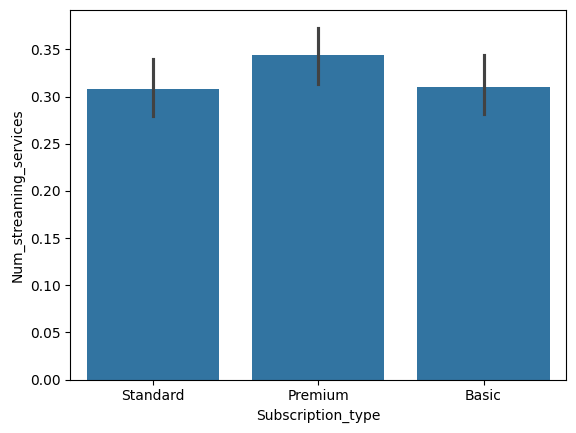

<Figure size 2000x5000 with 0 Axes>

In [29]:
sns.barplot(x='Subscription_type', y='Num_streaming_services', data=df)
plt.figure(figsize=(20, 50))

plt.show()

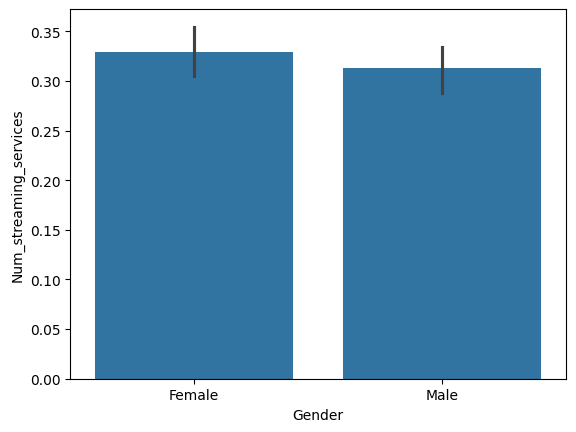

<Figure size 7000x5000 with 0 Axes>

In [30]:
sns.barplot(x='Gender', y='Num_streaming_services', data=df)
plt.figure(figsize=(70, 50))
plt.show()

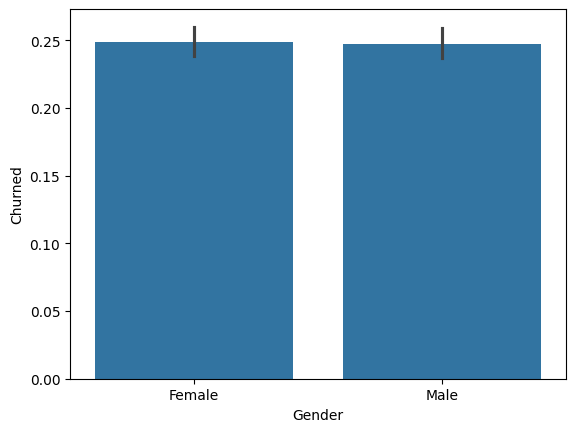

<Figure size 2000x1500 with 0 Axes>

In [31]:
sns.barplot(x='Gender', y='Churned', data=df)
plt.figure(figsize=(20, 15
                    ))
plt.show()

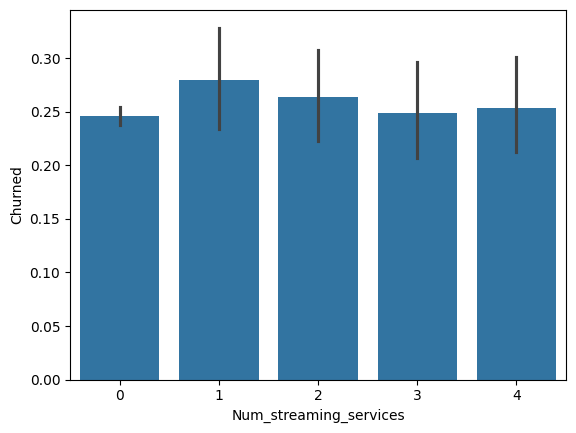

In [32]:
sns.barplot(data=df, x='Num_streaming_services', y='Churned');

In [33]:
df.columns

Index(['Age', 'Gender', 'Time_on_platform', 'Devices_connected',
       'Subscription_type', 'Num_streaming_services', 'Num_active_profiles',
       'Avg_rating', 'Churned', 'User_id', 'tempo_ por_usuario',
       'Churned_label'],
      dtype='object')

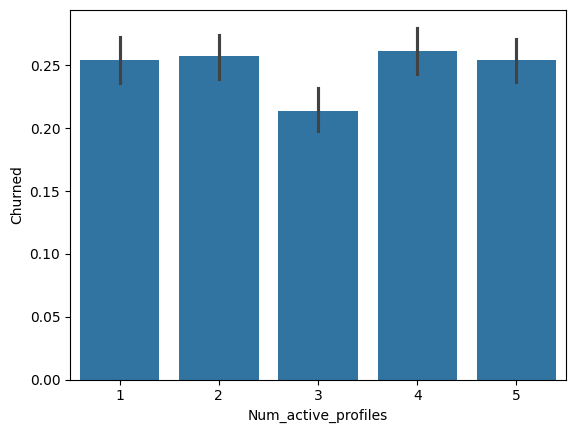

In [34]:
sns.barplot(data=df, x='Num_active_profiles', y='Churned');

In [35]:
df.columns

Index(['Age', 'Gender', 'Time_on_platform', 'Devices_connected',
       'Subscription_type', 'Num_streaming_services', 'Num_active_profiles',
       'Avg_rating', 'Churned', 'User_id', 'tempo_ por_usuario',
       'Churned_label'],
      dtype='object')

In [36]:
df = df.drop(columns=['Churned'])
df = df.drop(columns =['User_id'])
df = df.drop(columns = ['tempo_ por_usuario'])

In [37]:
df.head()

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned_label
1,69,Female,6107,2,Standard,0,1,2,no
2,44,Male,6374,3,Premium,1,1,1,yes
9,21,Female,112,2,Basic,0,3,2,yes
15,30,Male,2306,3,Premium,0,5,3,no
22,49,Female,1015,1,Standard,2,1,3,yes


In [38]:
df_num = df.select_dtypes(include=[np.number])

In [39]:
df_num

,Age,Time_on_platform,Devices_connected,Num_streaming_services,Num_active_profiles,Avg_rating
1,69,6107,2,0,1,2
2,44,6374,3,1,1,1
9,21,112,2,0,3,2
15,30,2306,3,0,5,3
22,49,1015,1,2,1,3
...,...,...,...,...,...,...
77826,42,7835,2,0,1,4
77829,64,1049,3,0,4,3
77835,27,4295,1,0,4,4
77878,47,8334,2,0,1,1


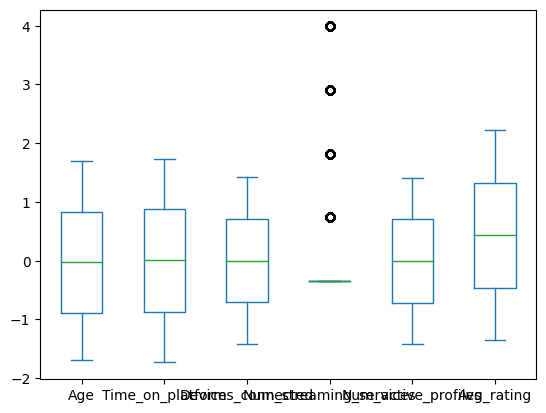

In [40]:
# Renomeia a variável que guarda o gráfico boxplot
boxplot = df_num.apply(scale).plot.box()
figsize = (10,15)

plt.show()

# Exemplo de remoção de outliers na coluna 'Avg_rating'
q1 = df_num.quantile(0.25)
q3 = df_num.quantile(0.75)
iqr = q3 - q1

# Limites para os outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Filtrando o DataFrame para remover outliers e criando um novo DataFrame
df_num = df_num[(df_num >= lower_bound) & (df_num <= upper_bound)]

In [41]:
df_num.replace([np.inf, -np.inf], np.nan, inplace=True)
print(df)


       Age  Gender  Time_on_platform  Devices_connected Subscription_type  \
1       69  Female              6107                  2          Standard   
2       44    Male              6374                  3           Premium   
9       21  Female               112                  2             Basic   
15      30    Male              2306                  3           Premium   
22      49  Female              1015                  1          Standard   
...    ...     ...               ...                ...               ...   
77826   42  Female              7835                  2           Premium   
77829   64  Female              1049                  3           Premium   
77835   27    Male              4295                  1           Premium   
77878   47  Female              8334                  2          Standard   
77883   68  Female              7078                  1          Standard   

       Num_streaming_services  Num_active_profiles  Avg_rating Churned_labe

In [42]:
df[df_num.columns]= df_num

In [43]:
 df.replace([np.inf, -np.inf], np.nan, inplace=True)
print(df)


       Age  Gender  Time_on_platform  Devices_connected Subscription_type  \
1       69  Female              6107                  2          Standard   
2       44    Male              6374                  3           Premium   
9       21  Female               112                  2             Basic   
15      30    Male              2306                  3           Premium   
22      49  Female              1015                  1          Standard   
...    ...     ...               ...                ...               ...   
77826   42  Female              7835                  2           Premium   
77829   64  Female              1049                  3           Premium   
77835   27    Male              4295                  1           Premium   
77878   47  Female              8334                  2          Standard   
77883   68  Female              7078                  1          Standard   

       Num_streaming_services  Num_active_profiles  Avg_rating Churned_labe

In [44]:
print(df)

       Age  Gender  Time_on_platform  Devices_connected Subscription_type  \
1       69  Female              6107                  2          Standard   
2       44    Male              6374                  3           Premium   
9       21  Female               112                  2             Basic   
15      30    Male              2306                  3           Premium   
22      49  Female              1015                  1          Standard   
...    ...     ...               ...                ...               ...   
77826   42  Female              7835                  2           Premium   
77829   64  Female              1049                  3           Premium   
77835   27    Male              4295                  1           Premium   
77878   47  Female              8334                  2          Standard   
77883   68  Female              7078                  1          Standard   

       Num_streaming_services  Num_active_profiles  Avg_rating Churned_labe

In [45]:
df = df.fillna(0)

In [46]:
df

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned_label
1,69,Female,6107,2,Standard,0.0,1,2,no
2,44,Male,6374,3,Premium,0.0,1,1,yes
9,21,Female,112,2,Basic,0.0,3,2,yes
15,30,Male,2306,3,Premium,0.0,5,3,no
22,49,Female,1015,1,Standard,0.0,1,3,yes
...,...,...,...,...,...,...,...,...,...
77826,42,Female,7835,2,Premium,0.0,1,4,no
77829,64,Female,1049,3,Premium,0.0,4,3,no
77835,27,Male,4295,1,Premium,0.0,4,4,yes
77878,47,Female,8334,2,Standard,0.0,1,1,no


In [47]:
X = df.drop('Churned_label', axis=1)
y = df['Churned_label']

In [48]:
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

In [50]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [51]:
predictions = rf.predict(X_test)

In [52]:
accuracy = accuracy_score(y_test, predictions)
print(f"Acurácia: {accuracy*100:.2f}")

Acurácia: 79.14


In [53]:

predictions = rf.predict(X_test)


f1 = f1_score(y_test, predictions, average='weighted')


recall = recall_score(y_test, predictions, average='weighted')


precision = precision_score(y_test, predictions, average='weighted')

print(f"F1 Score: {f1*100:.2f}%")
print(f"Recall: {recall*100:.2f}%")
print(f"Precisão: {precision*100:.2f}%")


F1 Score: 74.10%
Recall: 79.14%
Precisão: 80.11%


In [54]:
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)


predictions = model.predict(X_test_scaled)


f1 = f1_score(y_test, predictions, average='weighted')
recall = recall_score(y_test, predictions, average='weighted')
precision = precision_score(y_test, predictions, average='weighted')

print(f"F1 Score: {f1*100:.2f}%")
print(f"Recall: {recall*100:.2f}%")
print(f"Precisão: {precision*100:.2f}%")


F1 Score: 70.06%
Recall: 72.60%
Precisão: 69.07%


In [55]:
knn = KNeighborsClassifier(n_neighbors=5)


knn.fit(X_train_scaled, y_train)

predictions = knn.predict(X_test_scaled)
f1 = f1_score(y_test, predictions, average='weighted')
recall = recall_score(y_test, predictions, average='weighted')
precision = precision_score(y_test, predictions, average='weighted')

print(f"F1 Score: {f1*100:.2f}%")
print(f"Recall: {recall*100:.2f}%")
print(f"Precisão: {precision*100:.2f}%")

F1 Score: 67.48%
Recall: 71.46%
Precisão: 66.07%


In [56]:
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)


xgb = XGBClassifier(eval_metric='logloss', random_state=42)
xgb.fit(X_train_scaled, y_train_encoded)


predictions_encoded = xgb.predict(X_test_scaled)


predictions = le.inverse_transform(predictions_encoded)

f1 = f1_score(y_test, predictions, average='weighted')
recall = recall_score(y_test, predictions, average='weighted')
precision = precision_score(y_test, predictions, average='weighted')

print(f"F1 Score: {f1*100:.2f}%")
print(f"Recall: {recall*100:.2f}%")
print(f"Precisão: {precision*100:.2f}%")

F1 Score: 65.65%
Recall: 73.69%
Precisão: 65.19%


In [ ]:
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Defina os parâmetros para cada modelo
param_grid_knn = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

param_grid_logreg = [
    {'C': [0.1, 1, 10], 'penalty': ['l2'], 'solver': ['lbfgs'], 'max_iter': [1000]},
    {'C': [0.1, 1, 10], 'penalty': ['l1'], 'solver': ['liblinear'], 'max_iter': [1000]}
]

param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

param_grid_xgb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0]
}

# Instancie os modelos
knn = KNeighborsClassifier()
logreg = LogisticRegression(max_iter=1000)
rf = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(eval_metric='logloss', random_state=42)

# Configurar o GridSearchCV ou RandomizedSearchCV para cada modelo
grid_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='f1_weighted', n_jobs=-1)
randomized_logreg = RandomizedSearchCV(logreg, param_distributions=param_grid_logreg, n_iter=10, cv=5, scoring='f1_weighted', n_jobs=-1, random_state=42)
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='f1_weighted', n_jobs=-1)
grid_xgb = GridSearchCV(xgb, param_grid_xgb, cv=5, scoring='f1_weighted', n_jobs=-1)

# Treine os modelos usando GridSearchCV ou RandomizedSearchCV
grid_knn.fit(X_train_scaled, y_train)
randomized_logreg.fit(X_train_scaled, y_train)
grid_rf.fit(X_train_scaled, y_train)
grid_xgb.fit(X_train_scaled, y_train)

# Obtenha os melhores parâmetros e melhores scores para cada modelo
best_knn = grid_knn.best_estimator_
best_logreg = randomized_logreg.best_estimator_
best_rf = grid_rf.best_estimator_
best_xgb = grid_xgb.best_estimator_

print("Melhores parâmetros para KNN:", grid_knn.best_params_)
print("Melhores parâmetros para Regressão Logística:", randomized_logreg.best_params_)
print("Melhores parâmetros para Random Forest:", grid_rf.best_params_)
print("Melhores parâmetros para XGBoost:", grid_xgb.best_params_)

# Fazer previsões e calcular métricas para o melhor modelo de cada
for model, name in zip([best_knn, best_logreg, best_rf, best_xgb], ['KNN', 'Logistic Regression', 'Random Forest', 'XGBoost']):
    predictions = model.predict(X_test_scaled)
    f1 = f1_score(y_test, predictions, average='weighted')
    recall = recall_score(y_test, predictions, average='weighted')
    precision = precision_score(y_test, predictions, average='weighted')

    print(f"\n{name} - F1 Score: {f1*100:.2f}%")
    print(f"{name} - Recall: {recall*100:.2f}%")
    print(f"{name} - Precisão: {precision*100:.2f}%")

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
